# Qcodes example with Andor DU401 BU2

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
from qcodes.instrument_drivers.Andor.DU401 import Andor_DU401

## Initialize the instrument

The driver for this instrument provides the possibility to setup the instrument with some default settings. However, in this example we will setup the instrument manuall (setup=False).

In [2]:
andor = Andor_DU401("Andor", setup=False)

Connected to: Andor DU401_BU2 (serial:13789, firmware:3.255) in 5.58s


Start the cooler and set the set temperature to $-60$.

In [3]:
andor.cooler.set(True)
andor.set_temperature(-60)

After a moment, read the device temperature.

In [4]:
print(andor.temperature.get(), andor.temperature.unit)

22 °C


## Take a spectrum in the single scan acquisition mode
We take a spectrum in the single scan acquisition mode with full vertical binning. The exposure time is set to $1$s.

In [5]:
andor.acquisition_mode.set('single scan')
andor.read_mode.set('full vertical binning')
andor.trigger_mode.set('internal')
andor.shutter_mode.set('fully auto')
andor.exposure_time.set(1)

In [6]:
spectrum = andor.spectrum.get()

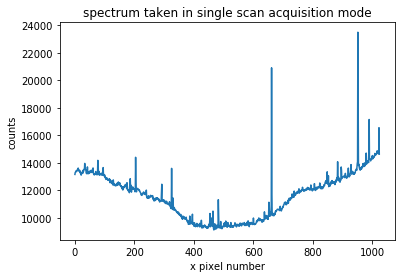

In [7]:
plt.figure()
plt.plot(spectrum)
plt.title('spectrum taken in single scan acquisition mode')
plt.xlabel('x pixel number')
plt.ylabel('counts');

## Take a spectrum in the accumulate acquisition mode
We take a spectrum in the accumulate acquisition mode with full vertical binning. The exposure time is set to $1$s and the number of accumulations is set to $10$. The filter for cosmic ray removal is turned on.

In [8]:
andor.acquisition_mode.set('accumulate')
andor.read_mode.set('full vertical binning')
andor.trigger_mode.set('internal')
andor.shutter_mode.set('fully auto')
andor.filter_mode.set(True)
andor.exposure_time.set(1)
andor.accumulation_cycle_time.set(1)
andor.number_accumulations.set(10)

In [9]:
spectrum = andor.spectrum.get()

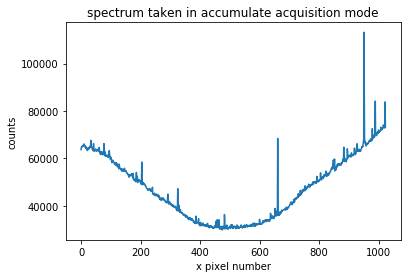

In [10]:
plt.figure()
plt.plot(spectrum)
plt.title('spectrum taken in accumulate acquisition mode')
plt.xlabel('x pixel number')
plt.ylabel('counts');

## Take a snapshot
We take a snapshot of the instrument to get an overview of the current settings.

In [11]:
andor.print_readable_snapshot()

Andor:
	parameter              value
--------------------------------------------------------------------------------
IDN                     :	{'vendor': 'Andor', 'model': 'DU401_BU2', 'serial':...
accumulation_cycle_time :	1 (s)
acquisition_mode        :	accumulate 
cooler                  :	True 
exposure_time           :	1 (s)
filter_mode             :	True 
number_accumulations    :	10 
read_mode               :	full vertical binning 
set_temperature         :	-60 (°C)
shutter_mode            :	fully auto 
spectrum                :	[63729, 64724, 64771, 64745, 65337, 65069, 65246, 6...
temperature             :	22 (°C)
trigger_mode            :	internal 


## Close the instrument

In [12]:
andor.close()